
# Introduction

Welcome to this two-part demonstration on using transformer models for the **Sentence-pair Classification Case Study!** In this case study, we shall use pre-trained transformer models to build an ML solution for *Quoflow*, a question-answering website similar to Quora.

Why is **sentence-pair classification** important?

> The ability to determine the similarity between pairs of sentences is a fundamental problem in natural language processing (NLP). Applications include question answering, paraphrase detection, and textual entailment, among others.


**Objective**
We will focus on the task of sentence-pair classification, where the goal is to predict whether two sentences are semantically equivalent or not.


To accomplish this task, we will be using the powerful **Huggingface** library, which provides a wide range of pre-trained transformer models and NLP pipelines for various NLP tasks. 

We will scaffold our learning in two parts:

* **Part 1** : *Introduction to Huggingface*

> In the first part of this tutorial, we will explore the different features and functionalities of the Huggingface library. You will learn how to use Huggingface pipelines to perform various NLP tasks such as sentiment analysis, text generation, and named entity recognition. You will also learn how to load a pre-trained transformer model  to perform any NLP task. By the end of this part, you will be able to customize Huggingface pipelines to process any input sentence.

* **Part 2**: *Fine-tuning BERT for Sentence-Pair Classification*

> In the second part of this tutorial, we will dive deeper into the sentence-pair classification task and show you how to fine-tune BERT-based models using Huggingface. We will use the Quora Question Pair (QQP) dataset, which is part of the GLUE benchmark, as our training and evaluation data. 


By the end of both notebooks, you will have a solid understanding of how to work with the Huggingface library, how to fine-tune BERT-based models for sentence-pair classification, and how to evaluate the performance of your models using appropriate metrics. You will also have the knowledge and skills to customize the models and pipelines for your own NLP tasks.

## Introduction to Huggingface

[Huggingface](https://huggingface.co/) is one of the most popular library for Natural Language Processing (NLP). It has revolutionized the field of Artificial Intelligence(AI) by providing a platform through which anyone can access the latest models in each of the domain like Computer vision, Natural Language Processing, Audio, etc.


### Why it's one of the most popular platform?

Before Huggingface, research in NLP was conducted in silos, and it was difficult for the community to access any of the latest models from the [hub](https://huggingface.co/models). Therefore, Huggingface has **democratized the research by giving users direct access to state-of-the-art models**. With its simple and intuitive API, Huggingface has made it easier than ever for researchers and developers to incorporate NLP models into their applications.
Using its platform, you can easily download any model, fine-tune it, and create models for your custom task.


### What's this notebook about?
One of the most disruptive and innovative architecture in NLP is Transformer. a type of neural network architecture that has achieved state-of-the-art performance in many NLP tasks. Huggingface provides pre-trained transformer models that can be fine-tuned on specific tasks, as well as tools for training custom transformer models from scratch.

**Pre-requisites to understand this notebook** :

This notebook revolves around utilising different transformer models and applying them to solve different NLP tasks, therefore we expect you to go through the theory of Transformer architecture covered in the previous session.

---


**Learning Objectives**:
> In this notebook: 
1. You will explore the different features and functionalities of the Huggingface library.
2. You will look into the different pipelines and demonstrate how to use them for NLP tasks like sentiment analysis, text generation & named entity recognition.
3. You will learn how to load a pre-trained transformer model to perform any NLP task.
4. You will dissect the pipeline feature of Huggingface and customise it to process any input sentence.


*So let's start our journey

## Task 0: Installing the transformers

To use Huggingface, you need to install the transformers library. You can do this by running the following command in your Colab notebook:

In [1]:
!pip install transformers

     ---------------------------------------- 0.0/43.8 kB ? eta -:--:--
     -------------------------- ----------- 30.7/43.8 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 43.8/43.8 kB 533.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.1 MB 21.1 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.1 MB 26.5 MB/s eta 0:00:01
   ------------- -------------------------- 3.1/9.1 MB 21.8 MB/s eta 0:00:01
   --------------- ------------------------ 3.6/9.1 MB 20.9 MB/s eta 0:00:01
   ------------------ --------------------- 4.3/9.1 MB 18.2 MB/s eta 0:00:01
   --------------------- ------------------ 4.9/9.1 MB 17.4 MB/s eta 0:00:01
   ------------------------ --------------- 5.5/9.1 MB 16.8 MB/s eta 0:00:01
   -------------------------- ------------- 6.1/9.1 MB 16.2 MB/s eta 0:00:01
   ----------------------------- ---------- 6.7/9.1 MB 16.0 MB/s eta 0:00:01
   ---

In [5]:
!pip install tensorflow

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 1.1/377.0 MB 22.2 MB/s eta 0:00:17
   ---------------------------------------- 2.5/377.0 MB 26.4 MB/s eta 0:00:15
   ---------------------------------------- 3.1/377.0 MB 21.9 MB/s eta 0:00:18
   ---------------------------------------- 3.7/377.0 MB 19.7 MB/s eta 0:00:19
   ---------------------------------------- 4.3/377.0 MB 18.3 MB/s eta 0:00:21
    --------------------------------------- 4.9/377.0 MB 17.5 MB/s eta 0:00:22
    --------------------------------------- 5.5/377.0 MB 16.8 MB/s eta 0:00:23
    --------------------------------------- 6.1/377.0 MB 16.4 MB/s eta 0:00:23
    ---------------------------------------

In [2]:
pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------ --------------- 1.0/1.7 MB 22.0 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 22.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


This will install the latest version of the library.

## **Task 1: Pipelines**
Huggingface provides a high-level API called **pipelines** that makes it easy to perform a variety of NLP tasks with just a few lines of code. 

Pipelines are objects that encapsulate all the necessary preprocessing, tokenization, and model inference steps for a given task, so you don't have to worry about the implementation details.

 **Available Pipelines**:

Huggingface provides a variety of pipelines for different NLP tasks. Here are some of the most commonly used ones:

* text-generation: Generates text based on a given prompt.
* text-classification: Classifies text into one or more categories.
* question-answering: Answers questions based on a given context.
* summarization: Summarizes a piece of text.
* translation: Translates text from one language to another.
* fill-mask : Predict the masked word based on the context of the sentence.
* ner: Recognizes named entities in a piece of text.




### **Task 1.1: Text classification using pipeline**

So now that you have seen what all pipelines we can use, let's go ahead and see an example of how to use the text classification pipeline:

In [3]:
from transformers import pipeline

# To perform a specific NLP task, you can simply create a pipeline object and specify the task you want to perform. 
classifier = pipeline('text-classification')
result = classifier('I love India!')
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

C:\Users\Kumar Shikhar\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Kumar Shikhar\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998743534088135}]


#### Understanding the Output

The output shows that the input sentence is classified as positive with a high score of 0.999.

The pipeline returns a list of dictionary for the input sequence. In this case, the dictionary contains a label and a score indicating the sentiment of the input text.



*Try playing with the input sentence to the classifier and observe the results.* 




- You noticed that you don't have to specify the model, the pipeline object automatically downloads the model on observing the input sequence and the task you specified. That's the power of pipeline!

- You can observe that by default the pipeline object called the `distilbert-base-uncased-finetuned-sst-2-english` model for classifying the input sentence. But what does each of this term in the model name mean?
    - `DistilBERT`: It is a smaller and faster variant*(distilled variant)* of the popular BERT (Bidirectional Encoder Representations from Transformers) model, developed by Huggingface. DistilBERT is trained in the same way as BERT, but with fewer parameters, resulting in a smaller model that is faster and more efficient to use. Despite its smaller size, it still achieves good performance on a wide range of NLP tasks.

 *  *The name "distil" stands for "distillation", as the model was distilled from the larger and more complex models to be more lightweight and efficient, while still maintaining a high level of performance.*

  -  `uncased`: It refers to the fact that the model is trained on text that has been converted to lowercase, so it does not distinguish between words that appear in different case forms. For example, the words "Hello" and "hello" would be treated the same by the model.

  -  `fine-tuned`: It means that the model has been trained on a specific task (in this case, sentiment analysis on the **Stanford Sentiment Treebank (SST-2)** dataset) after being pre-trained on a large corpus of text. Fine-tuning allows the model to adapt to the specific task it is being used for and improve its performance on that task.

You can pass in multiple sentences to do the same task of Text Classification:

In [ ]:
# List of input sentences
input_sentences = [
    "I don't like this movie",
    "Upgrad is helping me learn new and wonderful things.",
]

# Creating a pipeline object for sentiment analysis
classifier = pipeline("text-classification")

# Performing sentiment analysis on the input sentences
result = classifier(input_sentences)

# Printing the results
print(result)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9839025139808655}, {'label': 'POSITIVE', 'score': 0.9998325109481812}]


You can observe from the results that:
* For the first sentence, the model returns **Negative sentiment** with a high score of 98%
* For the second sentence, the model returns **Positive sentiment** with a high score of 99%

#### **Task 1.1.1: Load a pre-trained transformer model**

The pipeline automatically selects the best model based on the defined NLP task and input sentence. However, there are situations where you may want to use a specific pre-trained model for your task. 

For example, you may have previously fine-tuned a model for a specific task and want to use that same model for inference.

In addition, there may be cases where the pipeline's default model selection may not be the best option for your specific use case. In such cases, you can specify the model name to use a specific pre-trained model instead of relying on the pipeline's default model selection.

 Here's an example:


In [ ]:
# To use a pre-trained model for a specific NLP task, you can simply create a pipeline object, specify the task you want to perform & the model name you want to use. 
classifier = pipeline('text-classification', model = "roberta-base")
result = classifier('I love upGrad!')
print(result)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

[{'label': 'LABEL_0', 'score': 0.5161147713661194}]


The model returned returns a list of dictionary with a poor score. But why?

The label **LABEL_1** is not specific to any particular sentiment. Rather, it is a general label that the model assigns to one of the possible classes for the sentiment classification task. In this case, it means that the model has classified the sentiment of the input sentence as negative or neutral, but not positive.

The reason why the score is low for the sentence **"I love upGrad!"** when using the `roberta-base` model is likely due to the fact that this model was not specifically trained on the sentiment analysis task, unlike the `distilbert-base-uncased-finetuned-sst-2-english` model. The `roberta-base` model (a pre-trained RoBERTa model) is a general-purpose language model that can be fine-tuned on a variety of tasks, including sentiment analysis, but it may not perform as well as models that were specifically designed and trained for the sentiment analysis task.

### **Task 1.2: Text generation using pipeline**

We have learned how to classify text using pipeline, how about generating text? To do so, you have to rename the task inside the pipeline to `text-generation` and specify the model name (if required).

In [ ]:
# Creating a pipeline object for text generation with the "distilgpt2" model
generator = pipeline("text-generation", model="distilgpt2")

# Generating text starting with the given prompt
result = generator("In the galaxy far far away" )
                   
# Printing the generated text
print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In the galaxy far far away, the dark age began before any more galaxies were discovered, or even the galaxy would have faded out before there was any chance that anything else was there. On the other hand, things seemed really interesting as of today,'}]


Notice the output the model gave; it doesn't make much sense or human like. You can limit the output's length by passing additional arguments `max_length=30` as part of the generator input.

NOTE:  `distilgpt2` is a pre-trained language model based on the GPT-2 architecture, but with a smaller number of parameters.  The distilgpt2 model is particularly suitable for generating short and medium-length text sequences, such as headlines, captions, or tweets.

### **Task 1.3: Masked Entity Prediction using pipeline**

In Masked Language Modelling(MLM) or Masked Entity Prediction(MEP), the model is trained to predict a missing word in a given sentence where the word is replaced with a special token, usually `<mask>`.

In [ ]:
# Creating a pipeline object for masked language modeling
unmasker = pipeline("fill-mask")

# Generating predictions for the masked tokens in the input text
unmasker("You are going to <mask> about a wonderful library today.", top_k=2)

No model was supplied, defaulted to distilroberta-base (https://huggingface.co/distilroberta-base)
All model checkpoint layers were used when initializing TFRobertaForMaskedLM.

All the layers of TFRobertaForMaskedLM were initialized from the model checkpoint at distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForMaskedLM for predictions without further training.


[{'score': 0.5679107308387756,
  'token': 1798,
  'token_str': ' hear',
  'sequence': 'You are going to hear about a wonderful library today.'},
 {'score': 0.22818315029144287,
  'token': 1532,
  'token_str': ' learn',
  'sequence': 'You are going to learn about a wonderful library today.'}]

The output of the code provides a list of candidate words that could be used to replace the masked token in the input sentence. For each candidate word, the output also provides a score indicating the likelihood of that word being the correct replacement.

In this specific example, the top two(top_k = 2) candidate words for the masked token in the input sentence: **"You are going to <mask> about a wonderful library today."** are **"hear"** and **"learn"**. 

The first candidate word "hear" has a higher score of **0.5679** compared to the second candidate word "learn", which has a score of **0.2281.**

NOTE: When we ran the code, it is observed that the default model used is `distilroberta-base`, which is a smaller and faster version of the RoBERTa model. This model is trained on a large corpus of text to predict the missing words in a sentence, and it performs well on various NLP tasks such as sentiment analysis, text classification, and more.

## **Task 2: Looking inside the pipeline with Tensorflow API**


So far we have used pipeline with the model name to perform different NLP tasks like `text-classification`, `text-generation` & `fill-mask`. We understood that it automatically performs the necessary preprocessing, tokenization, and model inference steps for a given task.

However, we are not aware of what's happening inside the pipeline object. How it does all this operation automatically?


However, it's important to understand the internal workings of the pipeline object in order to use it effectively for various NLP tasks. By understanding the internal steps, we can also customize the pipeline to better suit our specific use case.

*So let's explore what's the magic inside pipeline.*

Pipelines are made of:

* A **tokenizer** in charge of mapping raw textual input to token.
* A **model** to make predictions from the inputs.
* Some (optional) post processing for enhancing model’s output.

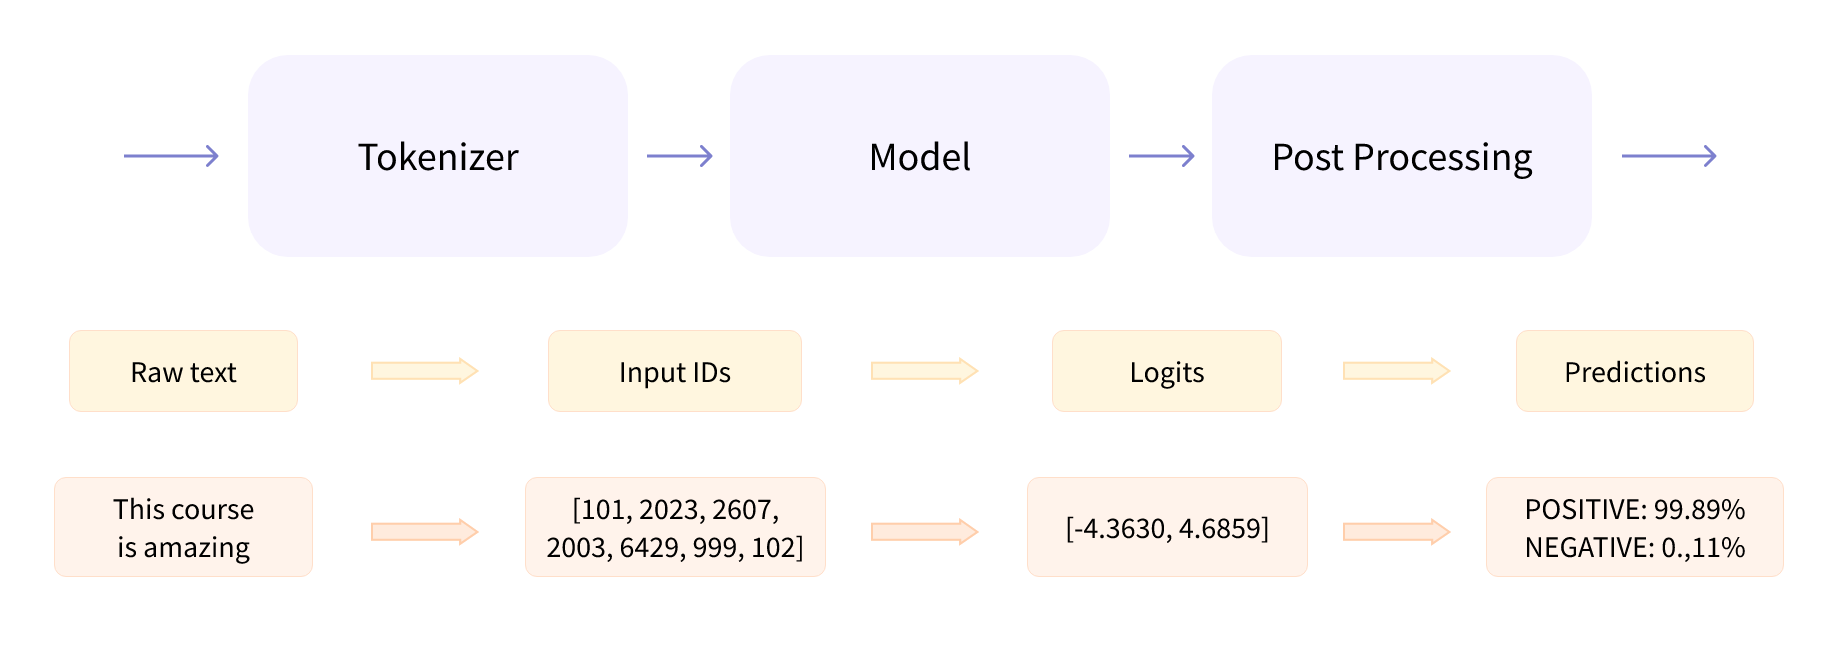




Let's understand each of these components one by one with a problem statement of **Classifying the input sentences into positive and negative sentiments**

### **Task 2.1 Tokenization**

The first step in the pipeline is tokenization. Tokenization is the process of breaking down raw text into individual units called tokens, which can be processed by machine learning models. The tokenizer takes raw text input and outputs tokens, input ids, attention mask, and token type ids.

When working with natural language processing tasks, it's often necessary to tokenize the text data by splitting it into individual words or subwords, and then encode those tokens into numerical representations that can be fed into a machine learning model. However, different tasks and models may require different tokenization schemes or tokenizers.

To resolve this, we will use the **AutoTokenizer** class from the transformers library. 
> It helps to simplify this process by automatically selecting the appropriate tokenizer for a given task and model, based on the provided model name or type.

In [ ]:
# Import the required libraries
from transformers import AutoTokenizer

# Instantiate a BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')


Here, we import the BertTokenizer class from the transformers library and create an instance of the tokenizer by specifying the pre-trained model bert-base-uncased.


Once we have imported the tokenizer, the next job is to define the input sentence that our tokenizer should encode:


In [ ]:
# Define multiple sentences as a single list 
input_sentences = [
    "I hate this movie",
    "Upgrad is helping me learn new and wonderful things.",
]

#### **Task 2.1.1: Input Encoding**
Once we have the tokenizer, we can use it to encode the input sentences. The tokenizer takes care of mapping the tokens to their corresponding IDs, adding special tokens such as `[CLS]` and `[SEP]` and producing the attention mask and token type ids. 

But what are they?

Broadly we have to create the input tensors required for model inference. The input tensor consists of three components: **input_ids, attention_mask, and token_type_ids.**

1. **Input IDs:** These are the unique integer values assigned to each token in the input sentence by the tokenizer. Each token in the input sentence is mapped to a unique integer value.

2. **Attention Mask:** This tensor is used to indicate which tokens in the input sentence are actual tokens and which ones are padding tokens. The padding tokens are marked as 0 in the attention mask tensor, and the actual tokens are marked as 1.

3. **Token Type IDs:** This tensor is used when we are passing input multiple sentences as input to the model. In our case, we are passing only a single list sentence, so we don't need to use this tensor.

We will use the `call()` method of the model to perform the inference. The `call()` method takes the input tensors as input and returns the predicted class labels for each input sentence.

Let's create the input tensors using the tokenizer() method and the two input sentences we defined earlier:

In [ ]:
# Encode the input sentences using the tokenizer
# The tokenizer maps tokens to their corresponding IDs, adds special tokens such as [CLS] and [SEP], 
# and produces the attention mask and token type ids

inputs = tokenizer(
    input_sentences,                            # list of input sentences
    add_special_tokens=True,                    # add special tokens
    max_length=12,                              # truncate to maximum length of 32 tokens
    padding=True,                               # Add padding to the tokens so that all inputs have same length
    truncation=True,                            # Truncate inputs to max length of the tokenizer
    return_tensors='tf'                         # return tensorflow tensors
)

print(inputs)

{'input_ids': <tf.Tensor: shape=(2, 12), dtype=int32, numpy=
array([[  101,  1045,  5223,  2023,  3185,   102,     0,     0,     0,
            0,     0,     0],
       [  101,  2039, 16307,  2003,  5094,  2033,  4553,  2047,  1998,
         6919,  2477,   102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 12), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}


In [ ]:
# Extract the input ids and attention mask from the encoded inputs
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

print(f"input_ids:\n{input_ids}")
print(f"attention_mask:\n{attention_mask}")

input_ids:
[[  101  1045  5223  2023  3185   102     0     0     0     0     0     0]
 [  101  2039 16307  2003  5094  2033  4553  2047  1998  6919  2477   102]]
attention_mask:
[[1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


The output is a dictionary with two keys, **"input_ids"** and **"attention_mask"**. These are the outputs of the tokenizer that we just applied to the input sentences.

* The output represents the tokenized version of the input sentence, where the  sentence has been converted into a sequence of integers that represent the corresponding tokens. 

* The `[CLS]` token is added at the beginning of each input sentence and the`[SEP]` token is added at the end of each input sentence, to mark the beginning and end of the sequence. Here the id 101 represent `[CLS]`, wheras 102 represents the `[SEP]` token. 


* The **"input_ids"** key contains a 2D Tensor of shape (2, 12), where the first dimension represents the number of samples/inputs passed and the second dimension represents the maximum length of tokens(max_length=12). 

* The length of the first sentence after tokenisation is less than max_length, therefore the remaining values(6) are padded by 0s. For the second sentence, no padding is applied since it's length is more than 12.  

* The **"attention_mask"** is used to indicate which tokens in the input sequence are "real" tokens and which tokens are padding tokens.

NOTE: If `padding="longest"`, the tokenizer will **pad all input sequences to the length of the longest sequence** in the batch. For example, if the input batch has two sentences with lengths 8 and 12, the tokenizer will pad the first sentence with 4 [PAD] tokens at the end, so that its length is also 12.


Read [this](https://huggingface.co/docs/transformers/pad_truncation) documentation to understand more on padding & truncation

### **Task 2.2:Model Inference**

After tokenization, the encoded input is passed through the model to make predictions.

#### **Task 2.2.1: Model**
We will use the `TFAutoModelForSequenceClassification` class from the transformers library, which is a pre-trained model specifically designed for sequence classification tasks. 

In [ ]:
# In order to get consistent results, we can set a random seed before calling the model.
# Import the required libraries
import random
import numpy as np
import tensorflow as tf

from transformers import TFAutoModelForSequenceClassification

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Instantiate a pre-trained BERT model for sequence classification
model = TFAutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.



We will use the call() method of the model to perform the inference. The call() method takes the input tensors as input and returns the predicted class labels for each input sentence.

In [ ]:
# Call the model with the input_ids and attention_mask tensors as inputs to get the output logits
logits = model(input_ids, attention_mask)[0]
print(logits)

tf.Tensor(
[[ 4.4376187 -3.5746415]
 [-4.1284213  4.4328394]], shape=(2, 2), dtype=float32)


The call() method returns the predicted class logits for each input sentence. 

The output of this call would be a tensor of shape (batch_size, num_labels) where batch_size is the number of inputs passed to the model and num_labels is the number of output labels for the classification task.

By default, the model returns the output logits, which are the unnormalized scores for each label. These scores are then passed through the softmax function to get the probabilities for each label.

In [ ]:
# Convert the logits to probabilities using the softmax function
probs = tf.nn.softmax(logits, axis=1)
print(probs)

tf.Tensor(
[[9.9966872e-01 3.3126504e-04]
 [1.9134136e-04 9.9980873e-01]], shape=(2, 2), dtype=float32)


The softmax() function applies the softmax activation function along the specified axis of the input tensor, which produces a probability distribution over the classes. In this case, the output tensor probs will have the same shape as the input tensor logits, and will contain the probability scores for each class.

The axis argument specifies which axis of the input tensor to apply the softmax function to. In this case, we want to apply the softmax function along the second axis (i.e., the axis with index 1), which contains the logits for each class.

We can extract the predicted class labels as follows:

In [ ]:
# Get the predicted class labels by taking the argmax of the probabilities along axis 1
predicted_labels = tf.argmax(probs, axis=1)
print(predicted_labels)

tf.Tensor([0 1], shape=(2,), dtype=int64)


To display the predicted label for each sentence, we can simply use the argmax function to get the index of the maximum probability in the probs tensor. 

In [ ]:
# Print the predicted labels for each sentence
for i, sentence in enumerate(input_sentences):
    label = "Positive" if predicted_labels[i] == 1 else "Negative"
    print(f"Sentence: {sentence}\nPredicted Sentiment: {label}\n")

Sentence: I hate this movie
Predicted Sentiment: Negative

Sentence: Upgrad is helping me learn new and wonderful things.
Predicted Sentiment: Positive

